In [2]:
import awswrangler as wr
import pandas as pd
#matplotlib is also required via pandas plot()

In [113]:
pd.set_option('display.max_colwidth', 500)

## Carga de datos

In [3]:
df_hogar_mania = wr.s3.read_parquet(path='s3://raw-recipe-data-bucket/hogar_mania')
df_antena3 = wr.s3.read_parquet(path='s3://raw-recipe-data-bucket/antena3')
df_saber_vivir = wr.s3.read_parquet(path='s3://raw-recipe-data-bucket/saber_vivir')
df_el_mundo = wr.s3.read_parquet(path='s3://raw-recipe-data-bucket/el_mundo')

In [4]:
print(f"Total recetas Hogar Mania: {df_hogar_mania.shape[0]}")
print(f"Total recetas Antena3: {df_antena3.shape[0]}")
print(f"Total recetas Saber Vivir: {df_saber_vivir.shape[0]}")
print(f"Total recetas El Mundo: {df_el_mundo.shape[0]}")
print("----------------")
print(f"Total recetas obtenidas: {df_hogar_mania.shape[0] + df_antena3.shape[0] + df_saber_vivir.shape[0] + df_el_mundo.shape[0]}")

Total recetas Hogar Mania: 7464
Total recetas Antena3: 2022
Total recetas Saber Vivir: 461
Total recetas El Mundo: 388
----------------
Total recetas obtenidas: 10335


In [5]:
df_hogar_mania.columns

Index(['titulo', 'categoria', 'ingredientes', 'elaboracion', 'link'], dtype='object')

In [6]:
df_hogar_mania.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7464 entries, 0 to 7463
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   titulo        7464 non-null   string
 1   categoria     7464 non-null   string
 2   ingredientes  7228 non-null   object
 3   elaboracion   7464 non-null   string
 4   link          7464 non-null   string
dtypes: object(1), string(4)
memory usage: 291.7+ KB


## Análisis

### Hogar Mania

In [10]:
df_hogar_mania.head(5)

,titulo,categoria,ingredientes,elaboracion,link
0,"Buñuelos de viento fáciles, la receta tradicio...",postres,"[125 gr de harina, 30 gr de mantequilla, 1/4 l...",Otoño no es solo época de calabazas y castañas...,https://www.hogarmania.com//cocina/recetas/pos...
1,Corona de hojaldre de Navidad,postres,"[2 láminas de hojaldre rectangular , 150 g de ...","Los polvorones, los turrones, los mazapanes o ...",https://www.hogarmania.com//cocina/recetas/pos...
2,Cafés de Navidad: Gingerbread Latte y Pumpkin ...,postres,"[2 cucharadas de azúcar moreno suave, 1/2 cuch...","La temporada de invierno, junto a la época nav...",https://www.hogarmania.com//cocina/recetas/pos...
3,12 ideas para rellenar el roscón de Reyes,postres,None,"El roscón de Reyes puede comerse solo, aunque ...",https://www.hogarmania.com//cocina/recetas/pos...
4,Mazapanes de Navidad,postres,"[300 gr. de almendra molida , 370 gr. de leche...",Mezcla en un bol la almendra molida con la lec...,https://www.hogarmania.com//cocina/recetas/pos...


In [13]:
df_hogar_mania.isna().sum()

titulo            0
categoria         0
ingredientes    236
elaboracion       0
link              0
dtype: int64

In [143]:
df_hogar_mania[pd.isnull(df_hogar_mania).any(axis=1)]

,titulo,categoria,ingredientes,elaboracion,link,total_ingredientes


In [23]:
df_hogar_mania[pd.isnull(df_hogar_mania).any(axis=1)]['categoria'].value_counts()

categoria
postres                 78
ensaladas-verduras      49
aperitivos              41
pastas-pizzas           12
sopas-cremas            12
bebidas                  9
pescados-mariscos        8
carnes                   6
huevos                   5
arroces-cereales         4
desayunos                4
salsas                   3
cocina-internacional     2
legumbres                1
setas-hongos             1
cocteles                 1
Name: count, dtype: Int64

In [44]:
df_hogar_mania.dropna(subset=["ingredientes"], inplace=True)

<Axes: xlabel='numero de recetas', ylabel='categoria'>

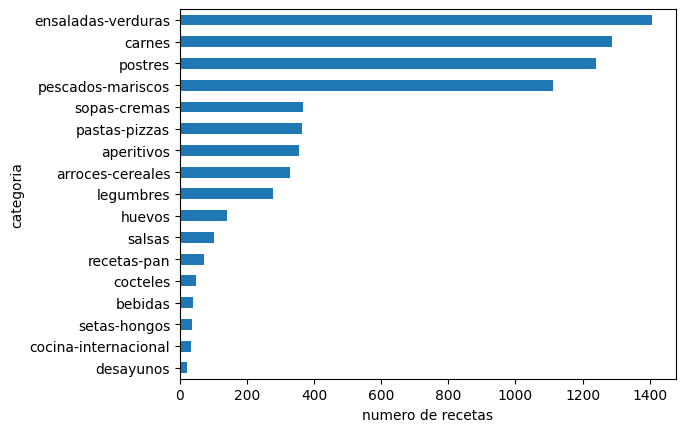

In [246]:
df_hogar_mania["categoria"].value_counts().sort_values().plot(kind='barh', xlabel='numero de recetas')

In [247]:
df_hogar_mania['total_ingredientes'] = df_hogar_mania['ingredientes'].apply(len)
df_hogar_mania['total_ingredientes'].describe()

count    7228.000000
mean       11.054787
std         4.303523
min         0.000000
25%         8.000000
50%        11.000000
75%        14.000000
max        67.000000
Name: total_ingredientes, dtype: float64

<Axes: xlabel='numero de recetas', ylabel='total_ingredientes'>

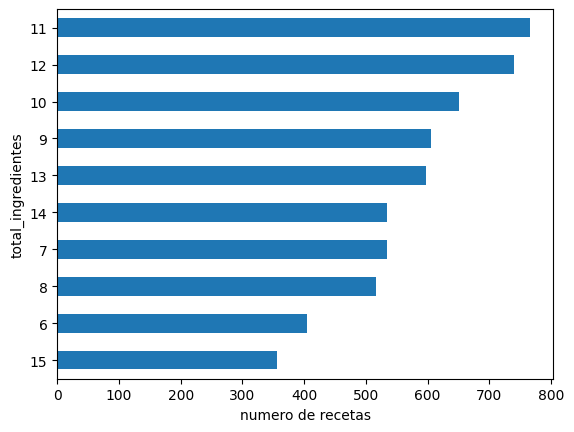

In [250]:
df_hogar_mania['total_ingredientes'].value_counts().head(10).sort_values().plot(kind='barh', xlabel='numero de recetas')

In [160]:
df_hogar_mania[df_hogar_mania['total_ingredientes'] == 0].head(5)

,titulo,categoria,ingredientes,elaboracion,link,total_ingredientes
110,Flan de mascarpone y leche condensada,postres,[],"Pon el azúcar en una sartén, agrega unas gotas de zumo de limón y ponlo a calentar hasta que conseguir un caramelo. Cuando empiece a tostarse, remuévelo con una cuchara. Viértelo sobre los moldes y espárcelo bien. Casca los huevos en un bol grande y bátelos con la batidora eléctrica de varillas. Agrega la leche entera, la leche condensada y el queso mascarpone. Sigue batiendo hasta conseguir una crema homogénea. Reparte la mezcla en los moldes especiales para flan. Pon un poco de agua en un ...",https://www.hogarmania.com//cocina/recetas/postres/flan-mascarpone-leche-condensada-24231.html,0
713,Velos de azafrán con macarrón y helado de té,postres,[],"Macarrón de almendra: 500gr de T.P.T90gr Clara de huevo445gr de Merengue italiano T.P.T : 250 gr de Azúcar glace250 gr Almendra en polvo Merengue italiano: 250gr de Azúcar en grano100gr de Agua95 gr de Clara de huevo Mousse de naranja (Relleno del macarrón): 30gr de mascarpone.15gr de mermelada de naranja 90gr de nata1 unid de Gelatina Para la Gelatina de pistilos de azafrán: 250gr de agua0,3gr de hebras de azafrán35gr de azúcar20gr de zumo de limón0,5gr de Agar-Agar Para el helado de té Ea...",https://www.hogarmania.com//cocina/recetas/postres/velos-azafran-macarron-helado-42289.html,0
891,Crepes de chocolate y plátano,postres,[],"Coloca los huevos, la harina, la leche, la mitad de azúcar, un pizca de sal, el aceite y el aroma de vainilla en un vaso batidor. Tritúralos con una batidora hasta que queden perfectamente integrados. Calienta una sartén con una nuez de mantequilla. Vierte una porción de masa, extiéndela bien por toda la sartén y deja que cuaje. Dale la vuelta y deja que cuaje por el otro lado. Repite el proceso hasta terminar toda la masa. Saca los crepes a un plato y resérvalos (el primer crepe siempre se ...",https://www.hogarmania.com//cocina/recetas/postres/crepes-chocolate-platano-26540.html,0
1354,Gazpachuelo tibio de carabineros y rape con almendras,aperitivos,[],"Para el caldo: Cuece todos los ingredientes a fuego lento, espumando en su debido momento, da el punto de sal y cuela sin triturar, tras un cuarto de hora de cocción. Para el gazpachuelo: Dora el puerro picado en el aceite a fuego suave, añade la patata picada finamente y el caldo de pescado, deja que hierva lentamente añadiendo a mitad de la cocción los calabacines (la cocción completa dura unos 20 minutos). En un bol aparte, coloca la mahonesa y añade la preparación anterior poco a poco,...",https://www.hogarmania.com//cocina/recetas/aperitivos/gazpachuelo-tibio-carabineros-rape-almendras-10950.html,0
1433,"Higos a la plancha con riñones, queso del Roncal, tocino crujiente y vinagreta de cacahuetes",aperitivos,[],"Para los riñones: Lamina la cebolla y pica el ajo. Pocha ambos con el aceite a fuego muy suave. Cuando esté blanda la cebolla, y sin tomar mucho color, añade el jerez, el vinagre y el caldo y deja reducir a la mitad de su volumen. Da el punto de sal. Lamina los riñones, sazónalos y pásalos por una plancha caliente con una cucharada de aceite en una sartén, vuelta y vuelta, y reserva al calor. Para los higos a la plancha: Corta los higos en dos mitades. Pon una plancha al fuego con aceite y ...",https://www.hogarmania.com//cocina/recetas/aperitivos/higos-plancha-rinones-queso-roncal-11282.html,0


In [163]:
df_hogar_mania[df_hogar_mania['total_ingredientes'] == 0].shape[0]

18

In [200]:
df_hogar_mania[df_hogar_mania.duplicated(subset=['link'])].shape[0]

154

In [212]:
example_duplicated_links = df_hogar_mania[df_hogar_mania.duplicated(subset=['link'])][:3]['link']

In [213]:
df_hogar_mania[df_hogar_mania['link'].isin(example_duplicated_links)][['titulo','categoria']]

,titulo,categoria
186,Magdalenas de chocolate y leche condensada,postres
209,Cómo hacer croissants o cruasanes caseros,postres
250,Churros con chocolate a la taza,postres
7089,Magdalenas de chocolate y leche condensada,desayunos
7090,Cómo hacer croissants o cruasanes caseros,desayunos
7091,Churros con chocolate a la taza,desayunos


In [106]:
print(df_hogar_mania.iloc[0]['titulo'].upper())
print("------")
print(df_hogar_mania.iloc[0]["elaboracion"])

BUÑUELOS DE VIENTO FÁCILES, LA RECETA TRADICIONAL DE EVA ARGUIÑANO
------
Otoño no es solo época de calabazas y castañas, también llegan dulces típicos como los buñuelos de viento. Estas esponjosas bolas de masa elaboradas con harina, mantequilla y huevo, fritas en aceite, son un clásico en las pastelerías de España durante esta temporada.
Como los panellets y los huesos de Santo, los buñuelos de viento forman parte de las recetas típicas del Día de Todos los Santos, festividad del 1 de Noviembre. Un postre tradicional muy popular en muchas comunidades autónomas, y también en otras fechas del año. En Cataluña y Baleares se consumen durante la cuaresma como merienda o para acompañar el café, y en Valencia como desayuno. Mientras en Madrid y Andalucía son habituales, sobre todo, en Semana Santa.
La palabra buñuelo tiene dos posibles raíces: romana, el puñuelo, una especie de bola que los romanos amasaban con las manos; y francesa, el beignet, un dulce muy parecido al actual buñuelo. Sin 

In [176]:
for _, row in df_hogar_mania.head(5).iterrows():
    print(f"{row['titulo']} \n--- {row['link']}")
    print(f"{row['ingredientes']} \n--- TOTAL INGREDIENTES {row['total_ingredientes']}")

Buñuelos de viento fáciles, la receta tradicional de Eva Arguiñano 
--- https://www.hogarmania.com//cocina/recetas/postres/bunuelos-13530.html
['125 gr de harina' '30 gr de mantequilla' '1/4 l de agua'
 '40 gr de azúcar' '4 huevos' 'ralladura de medio limón' 'sal'
 'aceite de oliva' 'azúcar glas para espolvorear'] 
--- TOTAL INGREDIENTES 9
Corona de hojaldre de Navidad 
--- https://www.hogarmania.com//cocina/recetas/postres/corona-navidad-44985.html
['2 láminas de hojaldre rectangular ' '150 g de chocolate negro '
 '40 g de mantequilla ' '1 huevo ' 'azúcar glas '
 '200 g de moras y frambuesas ' 'hojas de menta '] 
--- TOTAL INGREDIENTES 7
Cafés de Navidad: Gingerbread Latte y Pumpkin Spice Latte 
--- https://www.hogarmania.com//cocina/recetas/postres/cafes-navidad-gingerbread-pumpkin-spice-latte.html
['2 cucharadas de azúcar moreno suave'
 '1/2 cucharadita de jengibre molido '
 '1/2 cucharadita de nuez moscada molida' '1/2 cucharadita de canela '
 '600 ml. de leche entera'
 '70 ml. caf

#### Antena3

In [115]:
df_antena3.head(5)

,titulo,categoria,ingredientes,elaboracion,link
0,"Receta de alcachofas en salsa, de Karlos Arguiñano: ""Una explosión de sabores""",ensaladas,"[8 huevos de codorniz, 1 cebolla, 2 dientes de ajo, 75 ml de txakoli, 400 ml de caldo de verduras, 1 cucharada de harina, Aceite de oliva virgen extra, Sal, Perejil, Calienta 3-4 cucharadas de aceite en una cazuela. Pela los dientes de ajo, lamínalos y agrégalos. Pela la cebolla, córtala en dados e incorpórala. Sazona y rehoga las hortalizas a fuego suave-medio durante 6-8 minutos. Agrega la harina y rehógala un poco. Vierte el txakoli, mezcla bien y dale un hervor. Vierte el caldo de verdur...","Pon los huevos en una cazuela, cúbrelos con agua y cuécelos durante 5 minutos a partir del momento en que el agua empiece a hervir. Refresca, pela y resérvalos. Calienta agua en la olla rápida y añade unas ramas de perejil. Pela las alcachofas retirándoles 4-5 capas de hojas. Recórtalas por la base y por la parte superior, e introdúcelas en la olla. Sazónalas, cierra la olla y cuécelas durante 4 minutos a partir del momento en que suba la válvula. Retíralas y escúrrelas boca abajo en una fue...",https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/alcachofas-salsa_202405076639f35dc18d400001bd4ea5.html
1,"Una receta sencilla, sabrosa y rápida de Joseba Arguiñano: ensaladilla ibérica",ensaladas,"[3 patatas, 3 zanahorias, 3 huevos, 4 lonchas de queso havarti, 150 g de fuet, 4 lonchas finas de cecina, 4 lonchas finas de jamón ibérico, 8 lonchas finas de lomo ibérico, 150 g de mahonesa, Sal, Picos de pan, Perejil]","Cuece de víspera las patatas con piel (30-35 minutos), las zanahorias peladas (20 minutos) y los huevos (10 minutos). Cuando se templen introdúcelos en el frigorífico y resérvalos para el día siguiente. Pela las patatas y los huevos, y rállalos (con la parte más ancha del rallador) a un bol. Ralla también las zanahorias. Ralla también las zanahorias | antena3.com Corta las lonchas de queso en daditos y añádelo. Retira la piel del fuet, córtalo en cuartos de luna finos e incorpóralo. Agrega...",https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/ensaladilla-iberica_20240506662f629fc0b95c0001d10f67.html
2,"Brócoli con champiñones y patatas, de Arguiñano: ""La receta que levanta el ánimo y ayuda al crecimiento del pelo""",ensaladas,"[6 champiñones, 2 patatas, 4 dientes de ajo, 125 g de jamón serrano (en lochas finas), Aceite de oliva virgen extra, Sal, Perejil]","Calienta agua en una sartén y sazónala. Lava los brócolis, suéltalos en ramilletes, colócalos en el accesorio para cocer al vapor y ponlo sobre la sartén. Tápalo y cuece los brócolis al vapor durante 12-15 minutos. Tápalo y cuece los brócolis al vapor | antena3.com Calienta 3 cucharadas de aceite en una sartén. Pela los ajos, lamínalos, agrégalos a la sartén y rehógalos un poco. Corta las lonchas de jamón en tiras gruesas, incorpóralas y saltéalas brevemente. Lava los champiñones, seca, la...",https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/brocoli-champinones-patatas_20240502663214bcc0b95c0001d6e7be.html
3,"Berenjenas a la crema, de Karlos Arguiñano: ""Una de las 100 mejores recetas del recetario español""",ensaladas,"[1 cebolla pequeña, 4 dientes de ajo, ½ l de leche, 150 ml de caldo de carne, 24 gambas, 60 g de jamón serrano (4 lonchas finas), 60 g de queso gruyere rallado, Aceite de oliva virgen extra, Harina, Sal, Perejil]","Calienta abundante aceite en una sartén grande, pela los ajos, añádelos (enteros) y fríelos a fuego medio hasta que se doren. Retíralos y tíralos. Pela las berenjenas, córtalas en rodajas de 1 cm, extiéndelas en una fuente y sazónalas. Pásalas por harina, introdúcelas en la sartén (a tandas) y fríelas por los 2 lados. Retíralas y escúrrelas sobre una fuente cubierta con papel absorbente de cocina. Pásalas por harina, introdúcelas en la sartén | antena3.com Cubre la base de 4 cazuelitas ind...",https://www.antena3.com/programas/karlos-arguinano/recetas/

In [125]:
df_antena3.isna().sum()

titulo                0
categoria             0
ingredientes          0
elaboracion           0
link                  0
total_ingredientes    0
dtype: int64

<Axes: ylabel='categoria'>

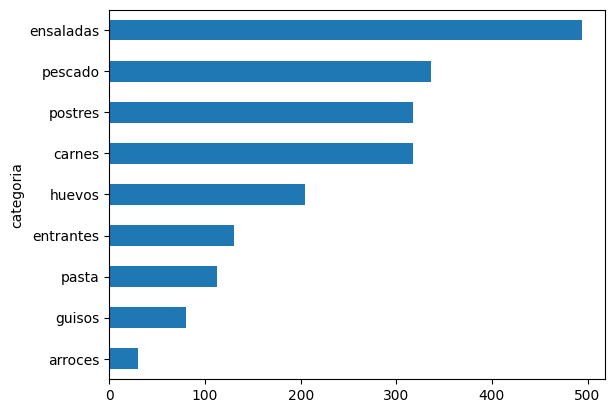

In [235]:
df_antena3["categoria"].value_counts().sort_values().plot(kind='barh')

In [229]:
df_antena3['total_ingredientes'] = df_antena3['ingredientes'].apply(len)
df_antena3['total_ingredientes'].describe()

count    2022.000000
mean       12.241345
std         8.403253
min         0.000000
25%         8.000000
50%        11.000000
75%        15.000000
max       137.000000
Name: total_ingredientes, dtype: float64

<Axes: xlabel='numero de recetas', ylabel='total_ingredientes'>

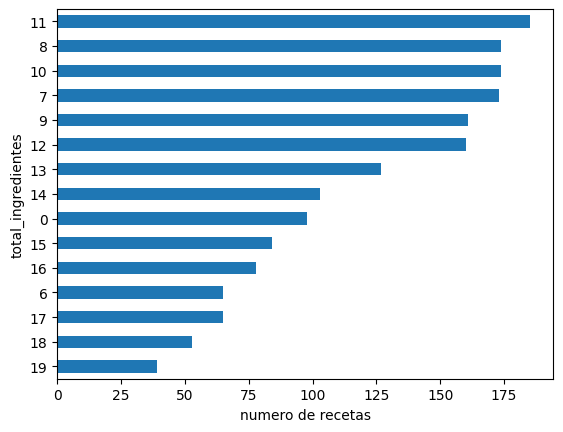

In [251]:
df_antena3['total_ingredientes'].value_counts().head(15).sort_values().plot(kind='barh', xlabel='numero de recetas')

In [129]:
df_antena3[df_antena3['total_ingredientes'] == 0]['categoria'].value_counts()

categoria
huevos       23
ensaladas    21
postres      20
pasta        11
pescado       9
carnes        9
entrantes     3
guisos        2
Name: count, dtype: Int64

In [144]:
df_antena3[df_antena3['total_ingredientes'] == 0]

,titulo,categoria,ingredientes,elaboracion,link,total_ingredientes
5,"Karlos Arguiñano: ""Esta es la forma más sencilla de hacer alcachofas""",ensaladas,[],,https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/forma-mas-sencilla-hacer-alcachofas_202404216620c75cc0b95c0001023a3c.html,0
69,"La ensalada exótica de Arguiñano: de escarola, fresas, aguacate y un aliño especial",ensaladas,[],,https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/escarola-fresas-aguacate-alino_20230524646df87c910a1b0001d95a8a.html,0
77,"Karlos Arguiñano sorprende con una ensalada de escarola, fresa y aguacate",ensaladas,[],,https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/ensalada-escarola-fresa-aguacate_2023032964242122a1e0b90001dd3ccd.html,0
130,Karlos Arguiñano: Las formas más variadas y saludables de elaborar unos cogollos refrescantes,ensaladas,[],,https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/variadas-saludables-elaborar-cogollos_2022071462cff57b98b3200001cfc1ef.html,0
158,"¿Te apasionan las berenjenas? Disfruta de las recetas más ricas, rápidas y fáciles de Arguiñano",ensaladas,[],,https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/apasionan-berenjenas-disfruta-recetas-mas-ricas-rapidas-faciles_202203296242cb5043a63f0001cc438f.html,0
...,...,...,...,...,...,...
1974,El juego por el Día de la Lasaña: ¿Cuál ha sido la receta de lasaña más vista de Karlos Arguiñano?,pasta,[],,https://www.antena3.com/programas/karlos-arguinano/recetas/pasta/juego-dia-lasana-cual-sido-receta-mas-vista_202007295f21431b6cf6da000157a0e1.html,0
1990,"Cazuela de arroz, achicoria y huevo cocido",pasta,[],,https://www.antena3.com/programas/karlos-arguinano/recetas/pasta/cazuela-de-arroz-achicoria-y-huevo-cocido_202001225e283cca0cf2ac911f7577b2.html,0
1999,Receta de Fideos con verduras y pollo,pasta,[],,https://www.antena3.com/programas/karlos-arguinano/recetas/pasta/receta-de-fideos-con-verduras-y-pollo_201909305d91eda40cf2ebc7f5a3b176.html,0
2000,Receta de Macarrones con compota de tomate y champiñones,pasta,[],,https://www.antena3.com/programas/karlos-arguinano/recetas/pasta/receta-de-macarrones-con-compota-de-tomate-y-champinones_201909245d89f69a0cf20dcdcc48908c.html,0


In [153]:
df_antena3[(df_antena3['elaboracion'].str.len() == 0) & (df_antena3['total_ingredientes'] == 0)]

,titulo,categoria,ingredientes,elaboracion,link,total_ingredientes
5,"Karlos Arguiñano: ""Esta es la forma más sencilla de hacer alcachofas""",ensaladas,[],,https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/forma-mas-sencilla-hacer-alcachofas_202404216620c75cc0b95c0001023a3c.html,0
69,"La ensalada exótica de Arguiñano: de escarola, fresas, aguacate y un aliño especial",ensaladas,[],,https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/escarola-fresas-aguacate-alino_20230524646df87c910a1b0001d95a8a.html,0
77,"Karlos Arguiñano sorprende con una ensalada de escarola, fresa y aguacate",ensaladas,[],,https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/ensalada-escarola-fresa-aguacate_2023032964242122a1e0b90001dd3ccd.html,0
130,Karlos Arguiñano: Las formas más variadas y saludables de elaborar unos cogollos refrescantes,ensaladas,[],,https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/variadas-saludables-elaborar-cogollos_2022071462cff57b98b3200001cfc1ef.html,0
158,"¿Te apasionan las berenjenas? Disfruta de las recetas más ricas, rápidas y fáciles de Arguiñano",ensaladas,[],,https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/apasionan-berenjenas-disfruta-recetas-mas-ricas-rapidas-faciles_202203296242cb5043a63f0001cc438f.html,0
...,...,...,...,...,...,...
1974,El juego por el Día de la Lasaña: ¿Cuál ha sido la receta de lasaña más vista de Karlos Arguiñano?,pasta,[],,https://www.antena3.com/programas/karlos-arguinano/recetas/pasta/juego-dia-lasana-cual-sido-receta-mas-vista_202007295f21431b6cf6da000157a0e1.html,0
1990,"Cazuela de arroz, achicoria y huevo cocido",pasta,[],,https://www.antena3.com/programas/karlos-arguinano/recetas/pasta/cazuela-de-arroz-achicoria-y-huevo-cocido_202001225e283cca0cf2ac911f7577b2.html,0
1999,Receta de Fideos con verduras y pollo,pasta,[],,https://www.antena3.com/programas/karlos-arguinano/recetas/pasta/receta-de-fideos-con-verduras-y-pollo_201909305d91eda40cf2ebc7f5a3b176.html,0
2000,Receta de Macarrones con compota de tomate y champiñones,pasta,[],,https://www.antena3.com/programas/karlos-arguinano/recetas/pasta/receta-de-macarrones-con-compota-de-tomate-y-champinones_201909245d89f69a0cf20dcdcc48908c.html,0


In [154]:
df_antena3[(df_antena3['elaboracion'].str.len() == 0) & (df_antena3['total_ingredientes'] > 0)]

,titulo,categoria,ingredientes,elaboracion,link,total_ingredientes
14,"Arguiñano, sobre la ensalada de endibias asadas y cremoso de gorgonzola: ""¡Qué ganas tengo de hincarle el diente!""",ensaladas,"[8 endibias, Sal, 40 g de mantequilla, Para las salsas:, 225 g de queso gorgonzola, 100 ml de aceite de girasol aromatizado con ajo, 150 g de nueces peladas, 150 ml de aceite de oliva virgen extra, Sal, Perejil, Pon el queso gorgonzola en un vaso americano, vierte la mitad del aceite aromatizado con ajo y tritura bien con una batidora eléctrica. Vierte el resto del aceite (ajos incluidos) y sigue triturando hasta que los ingredientes queden bien integrados., Calienta una sartén con la mitad ...",,https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/ensalada-endibias-asadas-cremoso-gorgonzola_2024030465e5a59129d8140001716cf6.html,15
15,"Receta de cogollos de lechuga a la plancha con atún, de Karlos Arguiñano",ensaladas,"[6 cogollos de lechuga, 200 g de atún en aceite, 1 cebolla roja pequeña, 10 g de pistachos pelados, 10 g de avellanas peladas, 1 cucharada de arándanos deshidratados, 1 cucharada de miel, Aceite de oliva virgen extra, Vinagre de manzana, Sal, Perejil, Para hacer la vinagreta, mezcla en un bol la miel con 2 cucharadas de vinagre y 100 ml de aceite. Bate los ingredientes con una varilla de mano., Pica los pistachos, las avellanas y los arándanos, y agrégalos al bol. Remueve los ingredientes y ...",,https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/cogollos-lechuga-plancha-atun_2024022665dc7690344c980001c04730.html,16
16,"Ensalada de repollo y zanahoria con manzana y mostaza, de Arguiñano",ensaladas,"[½ repollo morado, 3 zanahorias, 1 manzana Granny Smith, Zumo de 1 limón, 2 cucharadas de vinagre de manzana, 1 cucharada de semillas de hinojo, 2 cucharadas de mostaza de Dijon, 150 g de mahonesa, Sal, Perejil, Pon el zumo del limón en un bol grande. Añade el vinagre, las semillas de hinojo, la mostaza y la mahonesa. Mezcla los ingredientes y remuévelos con una varilla manual hasta que queden bien integrados. Reserva el aliño., Corta los repollos en juliana fina y ponlos en un bol grande., ...",,https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/ensalada-repollo-zanahoria-manzana-mostaza_2024022265d739514129260001ceec3b.html,15
101,Un entrante de gala de Arguiñano: endibias con queso azul y nueces,ensaladas,"[2-3 endibias, 150 g de queso azul, 12 nueces peladas, 6 orejones de albaricoque, 1 pera, 1 cucharada de miel, Aceite de oliva virgen extra, vinagre, perejil, Pon la miel en un bote de cristal, vierte 1 cucharada de vinagre y 2-3 cucharadas de aceite. Tapa el bote y bate los ingredientes. Reserva el aliño., Corta la base de las endibias, separa las hojas exteriores (las más grandes) y ponlas en una fuente. Pica finamente las hojas centrales y ponlas en un bol. Pica los orejones en daditos y ...",,https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/endibias-queso-azul-nueces_2022122263a4416e3a2bb40001322545.html,12
106,¡Boniato a todas horas! El protagonista en las recetas de invierno de Karlos Arguiñano,ensaladas,[Recuerda que las cremas son una buena opción para introducir en la dieta de los más pequeños un sinfín de hortalizas que de otra manera se negarían a comer.],,https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/boniato-protagonista-invierno_2022111763762351bbdbfb0001b0a32a.html,1
...,...,...,...,...,...,...
1950,"Receta de fideos marineros, de Karlos Arguiñano",pasta,"[225 g de fideo nº 2, 1 calamar mediano limpio, 1 rape mediano limpio (con huesos y cabeza), 12 almejas, 12 mejillones, 1 pimiento verde, ½ pimiento rojo, 3 dientes de ajo, 1 ñora, 1 huevo, aceite de oliva virgen extra, vinagre, sal, 1 cucharadita de pimentón, 10 hebras de azafrán, perejil, Calienta abundante agua en una cazuela. Agrega los huesos y cabeza del rape, unas ramas de perejil y una pizca de sal. Cuece los ingredientes durante 15 minutos (retira la

In [199]:
df_antena3[df_antena3.duplicated(subset=['link'])].shape[0]

0

In [173]:
for _, row in df_antena3.head(3).iterrows():
    print(f"{row['titulo']} \n--- {row['link']}")
    print(f"{row['ingredientes']} \n--- TOTAL INGREDIENTES {row['total_ingredientes']}")

Receta de alcachofas en salsa, de Karlos Arguiñano: "Una explosión de sabores" 
--- https://www.antena3.com/programas/karlos-arguinano/recetas/ensaladas/alcachofas-salsa_202405076639f35dc18d400001bd4ea5.html
['8 huevos de codorniz' '1 cebolla' '2 dientes de ajo' '75 ml de txakoli'
 '400 ml de caldo de verduras' '1 cucharada de harina'
 'Aceite de oliva virgen extra' 'Sal' 'Perejil'
 'Calienta 3-4 cucharadas de aceite en una cazuela. Pela los dientes de ajo, lamínalos y agrégalos. Pela la cebolla, córtala en dados e incorpórala. Sazona y rehoga las hortalizas a fuego suave-medio durante 6-8 minutos. Agrega la harina y rehógala un poco. Vierte el txakoli, mezcla bien y dale un hervor. Vierte el caldo de verdura y cocina la salsa a fuego suave durante 10 minutos y pásala a una jarra. Tritura los ingredientes con una batidora eléctrica hasta conseguir una salsa homogénea.'
 'Pon las alcachofas en una tartera (cazuela amplia y baja), viérteles la salsa por encima y cocínalas en la salsa dur

In [222]:
print(df_antena3.iloc[0]['titulo'].upper())
print("------")
print(df_antena3.iloc[0]["elaboracion"])

RECETA DE ALCACHOFAS EN SALSA, DE KARLOS ARGUIÑANO: "UNA EXPLOSIÓN DE SABORES"
------
Pon los huevos en una cazuela, cúbrelos con agua y cuécelos durante 5 minutos a partir del momento en que el agua empiece a hervir. Refresca, pela y resérvalos.
Calienta agua en la olla rápida y añade unas ramas de perejil.
Pela las alcachofas retirándoles 4-5 capas de hojas. Recórtalas por la base y por la parte superior, e introdúcelas en la olla. Sazónalas, cierra la olla y cuécelas durante 4 minutos a partir del momento en que suba la válvula. Retíralas y escúrrelas boca abajo en una fuente grande. Córtalas por la mitad y resérvalas.
 Sazónalas, cierra la olla y cuécelas durante 4 minutos | antena3.com 


#### Saber Vivir

In [165]:
df_saber_vivir.head(5)

,titulo,categoria,ingredientes,elaboracion,link
0,Crema de calabaza,Caldos y cremas,"[1 puerro pequeño, Media cebolla, 1 zanahoria, Medio tomate, 2 patatas, Medio kilo de calabaza, 1 brick de nata líquida, 1 pastilla de caldo (opcional), 2 vasos de agua, Aceite de oliva y sal]","Pon un chorrito de aceite en una cacerola. Pica el puerro y la cebolla y ponlos a pochar. Cuando esté dorada la cebolla, añade las patatas peladas y cortadas en cuadraditos y dóralas. A continuación, añade la zanahoria cortada en rodajas, el medio tomate y la calabaza cortada en cuadraditos. Remueve y rehoga todo bien. Luego, añade los dos vasos de agua, la pastilla de caldo y sal al gusto. Déjalo cocer hasta que la verdura se ablande bien. Pasa la verdura por la batidora, quitando las hebra...",https://www.sabervivir.es//nutricion-y-cocina/recetas-de-cocina/crema-de-calabaza
1,Crema de champiñones y queso,Caldos y cremas,"[600 gr. champiñones, 4 vasos leche, 2 vaso de caldo ave, 4 quesitos, 2 patatas, 50 gr. setas, 2 lonchas jamón cocido, 3 cucharadas aceite, 4 cucharadas harina, Sal, pimienta blanca]","Limpiar los champiñones de arenilla, hervirlos en agua con sal y zumo de limón durante 10 minutos. Aparte pocharemos las patatas peladas y cortadas en láminas finas en un recipiente con algo de aceite, cuando empiecen a ablandarse añadiremos los champiñones cocidos, los quesitos y algo de harina, rehogar todo unos minutos. Cubrir con el caldo de ave, la leche y el caldo de la cocción de los champiñones, cocer todo durante 25 minutos, triturar con la batidora y salpimentar. Servir bien calien...",https://www.sabervivir.es//nutricion-y-cocina/recetas-de-cocina/crema-de-champinones-y-queso
2,Crema de coles de Bruselas con jamón,Caldos y cremas,"[12 coles de Bruselas, 5 patatas medianas, Aceite de oliva, Pimienta blanca molida, 1 taza de caldo de verduras, 1 cebolla mediana, 2 dientes de ajo, Sal, Media taza de nata líquida]","Pelar, lavar y picar las patatas, la cebolla y los dientes de ajo. Lavar las coles y quitar las hojas exteriores. Calentar el aceite en una sartén amplia y rehogar la cebolla y los ajos durante 10 minutos. Incorporar la patata y las coles. Cubrir con caldo o agua, salpimentar y cocer durante 25-30 minutos, hasta que todo esté tierno. Triturar con la batidora y pasar por el pasapuré. Calentar de nuevo, añadir la nata, rectificar de sal y pimienta. Servir caliente.",https://www.sabervivir.es//nutricion-y-cocina/recetas-de-cocina/crema-de-coles-de-bruselas-con-jamon
3,Crema de espárragos con caviar,Caldos y cremas,"[1 manojo de espárragos verdes, 1 litro de caldo de verduras, 1 lata pequeña de caviar de mújol, unas hojas de cilantro fresco, 1 cucharada de pimienta roja machacada, 50 ml. vino blanco seco, 100 ml. nata líquida, Sal y pimienta, Aceite de oliva virgen extra]","Cocer durante 30 minutos las puntas en el caldo de verduras junto con el vino blanco. Añadir la nata líquida y pasar por la túrmix hasta conseguir una crema homogénea. Colar, salpimentar y reservar en la nevera hasta que se enfríe. Este proceso durará unas 3 horas. En el momento de llevar a la mesa, asegúrate bien de repartir la crema en los platos. Después, distribuye el caviar por encima de cada plato. Empieza a espolvorear con cilantro muy picado y con una pizca de pimienta roja, que adem...",https://www.sabervivir.es//nutricion-y-cocina/recetas-de-cocina/crema-de-esparragos-con-caviar
4,Crema de espinacas,Caldos y cremas,"[2 dientes de ajo picados, 1 vaso de arroz cocido, 1 litro de caldo, 1 cebolla picada, 4 clavos de olor, 200 cc. nata líquida, Cominos molidos, 800 gr. espinacas, 2 vasos de leche, 3 cucharadas de mantequilla, Nuez moscada, sal y pimienta]","Cocer las espinacas en agua hirviendo con sal durante un minuto. Enfriarlas bajo agua y escurrirlas. Derretir la mantequilla en una sartén. Añadir la cebolla y el ajo y sofreír a fuego lento unos 15 minutos. Sacar la sartén del fuego y echar las especias. Con un batidor de brazo, echar la cebolla y lo demás j

In [166]:
df_saber_vivir.isna().sum()

titulo          0
categoria       0
ingredientes    0
elaboracion     0
link            0
dtype: int64

<Axes: ylabel='categoria'>

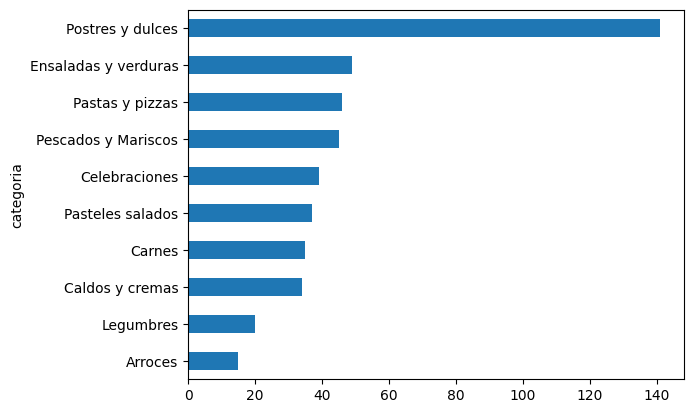

In [228]:
df_saber_vivir["categoria"].value_counts().sort_values().plot(kind='barh')

In [183]:
df_saber_vivir['total_ingredientes'] = df_saber_vivir['ingredientes'].apply(len)
df_saber_vivir['total_ingredientes'].describe()

count    461.000000
mean       8.661605
std        2.600673
min        3.000000
25%        7.000000
50%        9.000000
75%       11.000000
max       17.000000
Name: total_ingredientes, dtype: float64

<Axes: xlabel='numero de recetas', ylabel='total_ingredientes'>

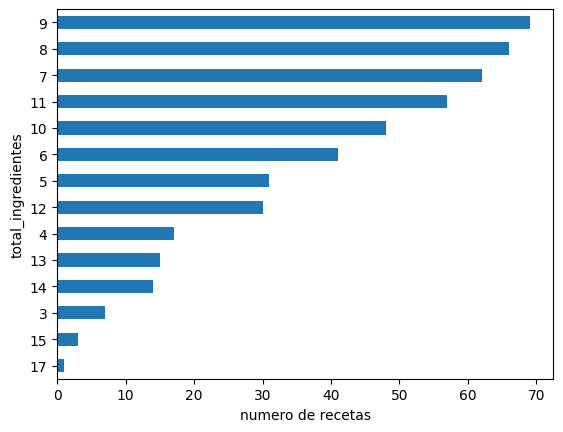

In [252]:
df_saber_vivir['total_ingredientes'].value_counts().sort_values().plot(kind='barh', xlabel='numero de recetas')

In [189]:
df_saber_vivir[(df_saber_vivir['elaboracion'].str.len() == 0)].shape[0]

0

In [198]:
df_saber_vivir[df_saber_vivir.duplicated(subset=['link'])].shape[0]

0

In [172]:
for _, row in df_saber_vivir.head(3).iterrows():
    print(f"{row['titulo']} \n--- {row['link']}")
    print(f"{row['ingredientes']} \n--- TOTAL INGREDIENTES {row['total_ingredientes']}")

Crema de calabaza 
--- https://www.sabervivir.es//nutricion-y-cocina/recetas-de-cocina/crema-de-calabaza
['1 puerro pequeño' 'Media cebolla' '1 zanahoria' 'Medio tomate'
 '2 patatas' 'Medio kilo de calabaza' '1 brick de nata líquida'
 '1 pastilla de caldo (opcional)' '2 vasos de agua'
 'Aceite de oliva y sal'] 
--- TOTAL INGREDIENTES 10
Crema de champiñones y queso 
--- https://www.sabervivir.es//nutricion-y-cocina/recetas-de-cocina/crema-de-champinones-y-queso
['600 gr. champiñones' '4 vasos leche' '2 vaso de caldo ave' '4 quesitos'
 '2 patatas' '50 gr. setas' '2 lonchas jamón cocido' '3 cucharadas aceite'
 '4 cucharadas harina' 'Sal, pimienta blanca'] 
--- TOTAL INGREDIENTES 10
Crema de coles de Bruselas con jamón 
--- https://www.sabervivir.es//nutricion-y-cocina/recetas-de-cocina/crema-de-coles-de-bruselas-con-jamon
['12 coles de Bruselas' '5 patatas medianas' 'Aceite de oliva'
 'Pimienta blanca molida' '1 taza de caldo de verduras'
 '1 cebolla mediana' '2 dientes de ajo' 'Sal' 'Me

In [221]:
print(df_saber_vivir.iloc[0]['titulo'].upper())
print("------")
print(df_saber_vivir.iloc[0]["elaboracion"])

CREMA DE CALABAZA
------
Pon un chorrito de aceite en una cacerola. Pica el puerro y la cebolla y ponlos a pochar.
Cuando esté dorada la cebolla, añade las patatas peladas y cortadas en cuadraditos y dóralas.
A continuación, añade la zanahoria cortada en rodajas, el medio tomate y la calabaza cortada en cuadraditos. Remueve y rehoga todo bien.
Luego, añade los dos vasos de agua, la pastilla de caldo y sal al gusto. Déjalo cocer hasta que la verdura se ablande bien.
Pasa la verdura por la batidora, quitando las hebras más grandes que hayan quedado.
Añade nata líquida al gusto y vuelve a batir.


#### El Mundo

In [177]:
df_el_mundo.head(5)

,titulo,categoria,ingredientes,elaboracion,link
0,"Tarta de queso al horno cremosa, receta casera y fácil",postres,"[Molde de tarta de 28 cm, 200 gramos de galletas maría, 120 gramos de mantequilla, 800 ml de nata, 800 gramos de queso crema (tipo philadelphia), 250 gramos de queso fresco, 8 huevos, 300 gramos de azúcar]","1.- En un vaso de batidora, trituramos las galletas maría. 2.- Seguidamente agregamos la mantequilla pomada o derretida y seguimos mezclando. Con esto haremos la pequeña base de galleta de la tarta. 3.- Colocamos la mezcla en la base del molde. 4.- En el mismo vaso de batidora. Colocamos los huevos, la nata, el azúcar y los quesos. trituramos bien. Podemos hacerlo en Thermomix o también a mano. Como mejor os venga o mejores utensilios tengáis. 5.- Precalentamos el horno a 180º e introducim...",https://recetasdecocina.elmundo.es/2018/12/tarta-queso-horno-receta-cremosa.html
1,"Crema catalana, receta fácil y casera",postres,"[8 huevos, 200 gramos de azúcar, 1 litro de leche, 40 gramos de maicena, 1 rama de canela, 1 corteza de limón, 1 vaina de vainilla]","1.- Por una parte mezclamos muy bien el azúcar con las yemas de huevo. 2.- En un cazo ponemos a calentar la leche con la piel de limón, la canela y la vaina de vainilla. Debe solo calentarse para poder infusionar, no debe hervir. 3.- En un vaso mezclamos la maicena con un poco de leche y agregamos esta mezcla a la leche inicial. 4.- Vamos moviendo hasta que este con el espesor que deseemos a fuego lento. Este es el punto de crear una crema pastelera perfecta. 5.- Ahora mezclamos la leche inf...",https://recetasdecocina.elmundo.es/2015/08/crema-catalana-receta-casera.html
2,"Cómo hacer tiramisú, el mejor postre italiano",postres,"[120 gramos de azúcar, 4 huevos, 400 gramos de bizcochos de soletilla o Savoidardi italianos, 400 ml de café + 100 ml de agua, 500 gramos de queso Mascarpone, Cacao amargo en polvo, 1 chorrito de licor de naranja (opcional, se lo añadiremos al agua y el café)]","1.- Para hacer la crema de Mascarpone vamos a utilizar dos recipientes ya que se hace en dos partes y luego se mezclan.2.- En el primer recipiente montamos las yemas con el azúcar (con solo la mitad, 60 gramos) lo mezclamos con una varilla hasta que tengamos una mezcla homogénea, después añadimos el queso Mascarpone hasta que no quede ningún grumo. 3.- En el segundo bol introducimos las claras de los huevos y el azúcar restante y lo ponemos a punto de nieve. Podemos incorporar una pizca de s...",https://recetasdecocina.elmundo.es/2012/09/tiramisu-como-hacer-su-receta-original.html
3,"Pasta de arroz con pollo y verduras, receta fácil y san",pasta,"[200 gramos de pasta de arroz, 1 ceboleta, Medio pimiento verde, Media pechuga de pollo, 1 chorrito de salsa de soja, 1 chorrito de salsa teriyaki]","1.- Comenzamos en un wok salteando las verduras. Yo he usado cebolleta y pimiento verde pero podéis ponerle las que más os gusten, o lo que tenéis en la nevera. 2.- A los 5 minutos de saltear las verduras, añadimos el pollo cortado en tiras. Cocinamos. 3.- Los fideos de arroz normalmente se hacen poniéndolo unos minutos en agua caliente, no suele hacer falta cocerlos. 4.- Ahora una vez estén listos, los añadimos al wok y salteamos con las verduras y el pollo. En este punto añadimos las sal...",https://recetasdecocina.elmundo.es/2024/05/pasta-de-arroz-con-pollo-y-verduras-receta-facil-y-san.html
4,"Pasta e fagioli, receta fácil y casera",pasta,"[1 bote de judías pintas cocidas, 200 gramos de pasta corta pequeña, 1 cebolla, 1 apio, 1 zanahoria, 1 pimiento rojo, 1 cucharada de pimentón de la vera, 1 cucharada de concentrado de tomate o 2 cucharadas de tomate frito. , Caldo de pollo]","1.- Comenzamos haciendo un buen sofrito de verduras. Yo he usado las que he citado pero podéis poner las que dispongáis en ese momento, eso si, recomiendo el apio que le da muy buen sabor y es una verduras que se usa mucho en Italia. Pochamos unos 10 minutos. 2.- Cuando esté bien pochadito, agregamos una cucha

In [178]:
df_el_mundo.isna().sum()

titulo          0
categoria       0
ingredientes    0
elaboracion     0
link            0
dtype: int64

<Axes: ylabel='categoria'>

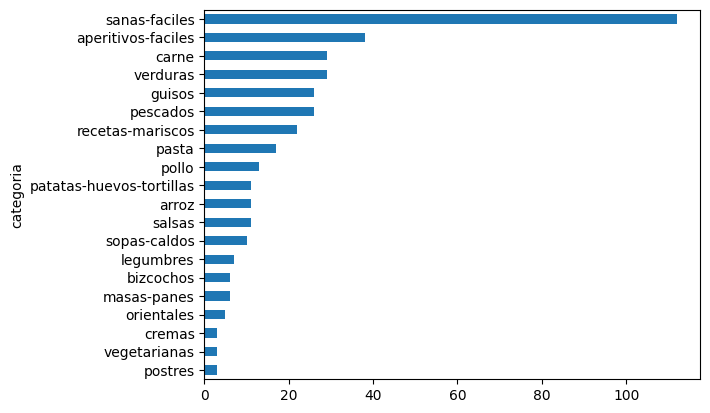

In [227]:
df_el_mundo["categoria"].value_counts().sort_values().plot(kind='barh')

In [181]:
df_el_mundo['total_ingredientes'] = df_el_mundo['ingredientes'].apply(len)
df_el_mundo['total_ingredientes'].describe()

count    388.000000
mean       8.067010
std        3.119604
min        2.000000
25%        6.000000
50%        8.000000
75%       10.000000
max       18.000000
Name: total_ingredientes, dtype: float64

<Axes: xlabel='numero de recetas', ylabel='total_ingredientes'>

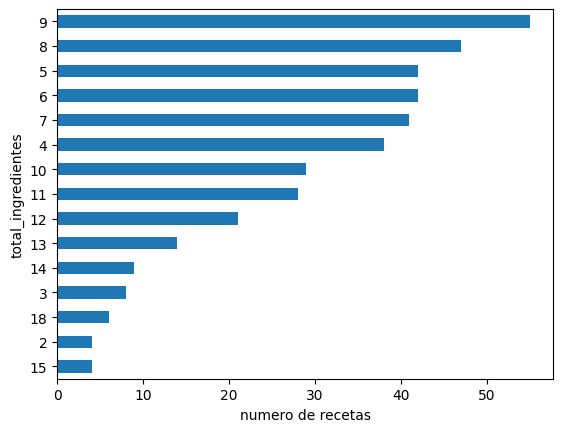

In [245]:
df_el_mundo['total_ingredientes'].value_counts().sort_values().plot(kind='barh', xlabel='numero de recetas')

In [190]:
df_el_mundo[(df_el_mundo['elaboracion'].str.len() == 0)].shape[0]

2

In [191]:
df_el_mundo[(df_el_mundo['elaboracion'].str.len() == 0)]

,titulo,categoria,ingredientes,elaboracion,link,total_ingredientes
142,"Berenjenas a la plancha, receta fácil y casera",verduras,"[2 berenjenas pequeñas, Leche, Sal, Un poco de aceite de oliva]",,https://recetasdecocina.elmundo.es/2023/05/berenjenas-a-la-plancha-receta-facil-casera.html,4
354,"Berenjenas a la plancha, receta fácil y casera",sanas-faciles,"[2 berenjenas pequeñas, Leche, Sal, Un poco de aceite de oliva]",,https://recetasdecocina.elmundo.es/2023/05/berenjenas-a-la-plancha-receta-facil-casera.html,4


In [253]:
df_el_mundo[df_el_mundo.duplicated(subset=['link'])].shape[0]

178

In [216]:
example_duplicated_links = df_el_mundo[df_el_mundo.duplicated(subset=['link'])][:3]['link']

In [217]:
df_el_mundo[df_el_mundo['link'].isin(example_duplicated_links)][['titulo','categoria']]

,titulo,categoria
21,"Sopa de arroz, receta tradicional y fácil",arroz
28,Arroz con rebozuelos y pollo,arroz
37,"Caldo de Navidad, receta fácil y casera",pollo
42,Arroz con rebozuelos y pollo,pollo
46,"Sopa de arroz, receta tradicional y fácil",sopas-caldos
48,"Caldo de Navidad, receta fácil y casera",sopas-caldos
305,"Sopa de arroz, receta tradicional y fácil",sanas-faciles
329,"Caldo de Navidad, receta fácil y casera",sanas-faciles


In [187]:
for _, row in df_el_mundo.head(3).iterrows():
    print(f"{row['titulo']} \n--- {row['link']}")
    print(f"{row['ingredientes']} \n--- TOTAL INGREDIENTES {row['total_ingredientes']}")

Tarta de queso al horno cremosa, receta casera y fácil 
--- https://recetasdecocina.elmundo.es/2018/12/tarta-queso-horno-receta-cremosa.html
['Molde de tarta de 28 cm' '200 gramos de galletas maría'
 '120 gramos de mantequilla' '800 ml de nata'
 '800 gramos de queso crema (tipo philadelphia)'
 '250 gramos de queso fresco' '8 huevos' '300 gramos de azúcar'] 
--- TOTAL INGREDIENTES 8
Crema catalana, receta fácil y casera 
--- https://recetasdecocina.elmundo.es/2015/08/crema-catalana-receta-casera.html
['8 huevos' '200 gramos de azúcar' '1 litro de leche'
 '40 gramos de maicena' '1 rama de canela' '1 corteza de limón'
 '1 vaina de vainilla'] 
--- TOTAL INGREDIENTES 7
Cómo hacer tiramisú, el mejor postre italiano 
--- https://recetasdecocina.elmundo.es/2012/09/tiramisu-como-hacer-su-receta-original.html
['120 gramos de azúcar' '4 huevos'
 '400 gramos de bizcochos de soletilla o Savoidardi italianos'
 '400 ml de café + 100 ml de agua' '500 gramos de queso Mascarpone'
 'Cacao amargo en polvo

In [218]:
print(df_el_mundo.iloc[0]['titulo'].upper())
print("------")
print(df_el_mundo.iloc[0]["elaboracion"])

TARTA DE QUESO AL HORNO CREMOSA, RECETA CASERA Y FÁCIL
------
1.- En un vaso de batidora, trituramos las galletas maría.
2.- Seguidamente agregamos la mantequilla pomada o derretida y seguimos mezclando. Con esto haremos la pequeña base de galleta de la tarta.
3.- Colocamos la mezcla en la base del molde.

4.- En el mismo vaso de batidora. Colocamos los huevos, la nata, el azúcar y los quesos. trituramos bien. Podemos hacerlo en Thermomix o también a mano. Como mejor os venga o mejores utensilios tengáis.

5.- Precalentamos el horno a 180º e introducimos durante 40 minutos con el calor arriba abajo. No os asustéis si cuando la saquéis está totalmente líquida. Dejamos enfriar la tarta y la introducimos en la nevera unas horas para que se enfríe. Cuando la partáis cuidado porque la parte interior debe quedar cremosa y así estará si seguís la receta al pie de la letra.
Lo podéis presentar con una bola de helado de vainilla que le va genial.


## Conclusiones